# Modelling the Market

Aim: Approximate market dynamics using Geometric Brownian Motion


## Gaussian Distribution

This is the most important probability distribtion, because the distribution of the average of the results of repeated experiments always approaches the normal distribution, as stated by central limit theorem.
We can first begin by calculating an integral:

$$I = \int_{-\infty}^{\infty} e^{-x^2} dx$$

Now note that:

$$I^2 = (\int^\infty_{-\infty} e^{-x^2} dx) \cdot (\int_\infty^{-\infty} e^{-x^2} dx)$$
$$ = (\int^\infty_{-\infty} e^{-x^2} dx) \cdot (\int^\infty_{-\infty} e^{-y^2} dy) $$
$$ = \int^\infty_{-\infty}\int^\infty_{-\infty} e^{-x^2-y^2} dxdy $$

Evaluating the integral in polar coordinates:

$$I^2 = \int^{2\pi}_{0}\int^\infty_{0} e^{-r^2}r drdr\theta = \int^{2\pi}_0 \frac{1}{2} d\theta = \pi $$

Therefore, $I = \sqrt{\pi}$. So that the integral is 1, we can arrange this as follows: define
$$N(x) = \frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}}$$
Then N(x) defines a probability distribution, which is the standard normal distribution. More generally, we define the normal distribution with parameters $\mu$ and $\sigma$ to be 
$$p(x) = \frac{1}{\sigma}N(\frac{x-\mu}{\sigma}) = \frac{1}{\sqrt{2\pi\sigma}}e^{\frac{-{(x-\mu)}^2}{2\sigma^2}}$$

### Random Walks

Let's begin with a symetric random walk, a simple demonstration can be set up by repeatedly tossing a far coin (p, probability of H on each toss, and q = 1 - p, the probability of T on each toss, are both equal to $\frac{1}{2}$). We can denote the successive outcomes of the tosses by $\omega = \omega_1\omega_2\omega_3...$ In other words, $\omega$ is the infinite sequence of tosses, and $\omega_n$ is the outcome of the nth toss. Let 
$$ X_j = 
\begin{cases}
  1 & \text{if  } \omega_j = H,\\    
  -1 & \text{if  } \omega_j = T,    
\end{cases}
$$
and define $M_0$ = 0, 
$$ M_k = \sum^k_{j=1}X_j,\text{ } k = 1,2,...$$

The process $M_k,\text{ } k = 0,1,2,...$ is a symmetric random walk. With each toss, it either steps up or down one unit, and each of the two possibilities is equally likely. 

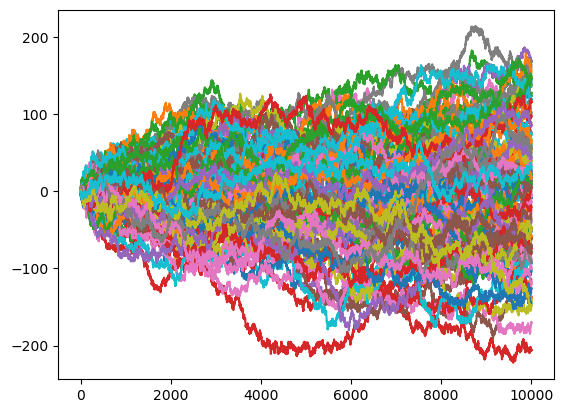

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def symmetric_random_walk(n):
    n_steps = n
    steps = np.random.choice([1, -1], size=n_steps)
    M = np.cumsum(steps)
    M = np.insert(M, 0, 0)
    return M

for i in range(100):
    plt.plot(symmetric_random_walk(10000), label=f'N={i}')

In [2]:
# Calculating the expected value of the random walk 
# E[M_n] = E[M_0] + E[S_1] + E[S_2] + ... + E[S_n]

# We expect the expected value of the random walk to be 0


def infty_walk():
    means = []
    for j in range(10000):
        means.append(np.mean([symmetric_random_walk(10000)]))
    return np.mean(means)

print(infty_walk())



0.5558018998100192


### Martingale

A martingale $\{Z_n;n\geq1\}$ is a stochastic process with the properites that $E[|Z_n|]<\infty$ for all n and $E[Z_{n+1}| Z_n=z_n, Z_{n-1} = z_{n-1},..., Z_1 = z_1 ]$ this can be extended to $E[Z_{m};m>n| Z_n=z_n, Z_{n-1} = z_{n-1},..., Z_1 = z_1 ] = z_n$, which means the conditional expected value of future $Z_m$ is the current value $Z_n$.
A symmetric random walk is a martingale. From the definition of the symmetric random walk we have: 
$ S_{n+1} = 
\begin{cases}
  S_n +1 \text{ with probability } \frac{1}{2},\\    
  S_n -1\text{ with probability } \frac{1}{2},    
\end{cases}
$ , so $E[S_{n+1}| S_n = s_n,..., S_1=s_1] = s_n$

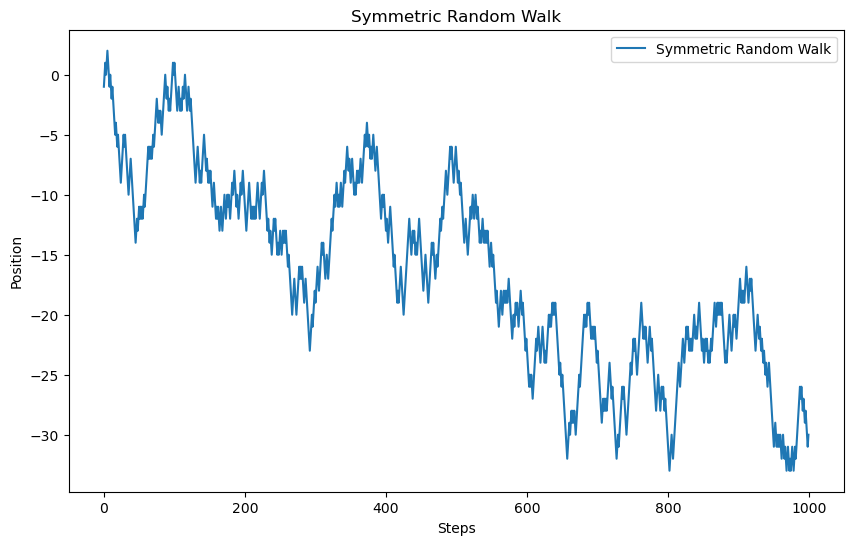

Expected value of the random walk: -16.564


In [3]:
import numpy as np
import matplotlib.pyplot as plt


n_steps = 1000  


def s_random_walk(n_steps):
    steps = np.random.choice([-1, 1], size=n_steps)
    walk = np.cumsum(steps)
    return walk


random_walk = s_random_walk(n_steps)


plt.figure(figsize=(10, 6))
plt.plot(random_walk, label='Symmetric Random Walk')
plt.title('Symmetric Random Walk')
plt.xlabel('Steps')
plt.ylabel('Position')
plt.legend()
plt.show()

# Verify Martingale Property
expected_value = np.mean(random_walk)
print(f"Expected value of the random walk: {expected_value}")

### Brownian Motion

A continous stochastic process $W(t), t\geq 0$, is a Brownian motion if 
- $W(0) = 0$
- The increments of the process $ W(t_1)-W(0), W(t_2)-W(t_1),...,W(t_n)-W(t_{n-1}) \text{ ,  } \forall 0 < t_1 \leq t_2 \leq...< t_n $ are independent;
- Each of these increments is normally distributed with distribution $W(t_{i+1})-W(t_i) \sim N(0,t_{i+1}-t_i)$

Some of the important properties of Brownian motion are the following: continous; $E[W(t)] = 0$; $E[W(t^2)] = t$; $W(t) \sim N(0,t)$;



### Theorem: Ito's Lemma

Ito's lemma is the chain rule for stochastic calculus.

Let B(t) be a Brownian motion and W(t) be an Ito drift-diffusion process which satisfies the stochastic differential equation:
$$dW(t) = \mu(W(t),t) dt + \sigma(W(t),t)dB(t)$$
if $f(w,t) \in C^2(\R^2,\R) \text{ then } f(W(t),t)$ is also an Ito drift-diffusion process, with its differential given by:

$d(f(W(t),t)) = \frac{\partial f}{\partial t}(W(t),t)dt + f'(W(t,t))dW + \frac{1}{2}f''(W(t),t)dW(t)^2$

With $dW(t)^2$ given by: $dt^2 = 0, dtdB(t) = 0 \text{ and } dB(t)^2 = dt$


### Weiner Processes

The change $\Delta z$ during a small period of time $\Delta t$ is: $$\Delta z = \epsilon \sqrt{\Delta t}$$ where $\epsilon$ is a random drawing from a standardized normal distribution N(0,1). The values of $\Delta z$ for any two different short intervals of time $\Delta t$ are independent.
It follows from the first property that $\Delta z$ itself has a normal distribution with:
$$
\text{mean of } ∆z = 0 \\
\text{standard deviation of }∆z  = \sqrt(∆t)\\
\text{variance of }∆z = ∆t

$$
The second property implies that $z$ follows a Markov process. Consider the increase in the values of $z$ during a relatively long period of time T. This can be denoted by $z(T) - z(0)$. It can be regarded as the sum of the increases in $z$ in $N$ small time intervals of length $\Delta t$, where $N = \frac{T}{\Delta t}$ 

Thus $$z(T) - z(0) = \sum^N_{i=1}\epsilon\sqrt{\Delta t}$$ 
where the $\epsilon_i(1,2,...,N)$ are random drawing from N(0,1)

A Markov process is a particular type of stochastic process where only the present value for a
variable is relevant for predicting the future. The past history of the variable and the way that the
present has emerged from the past are irrelevant. Stock prices are usually assumed to follow a Markov
process. 

Suppose that the price of IBM stock is \$100 now. If the stock price follows a Markov process,
our predictions should be unaffected by the price one week ago, one month ago, or one year ago. The
only relevant piece of information is that the price is now \$ 100.

Predictions for the future are uncertain and must be expressed in terms of probability distributions.
The Markov property implies that the probability distribution of the price at any particular future
time is not dependent on the particular path followed by the price in the past.

The Markov property of stock prices is consistent with the weak form of market efficiency. This states
that the present price of a stock impounds all the information contained in a record of past prices. If
the weak form of market efficiency were not true, technical analysts could make above-average returns
by interpreting charts of the past history of stock prices. There is very little evidence that they are,
in fact, able to do this.

Statistical properties of the stock price history of IBM may be useful in determining the characteristics
of the stochastic process followed by the stock price (e.g. its volatility).

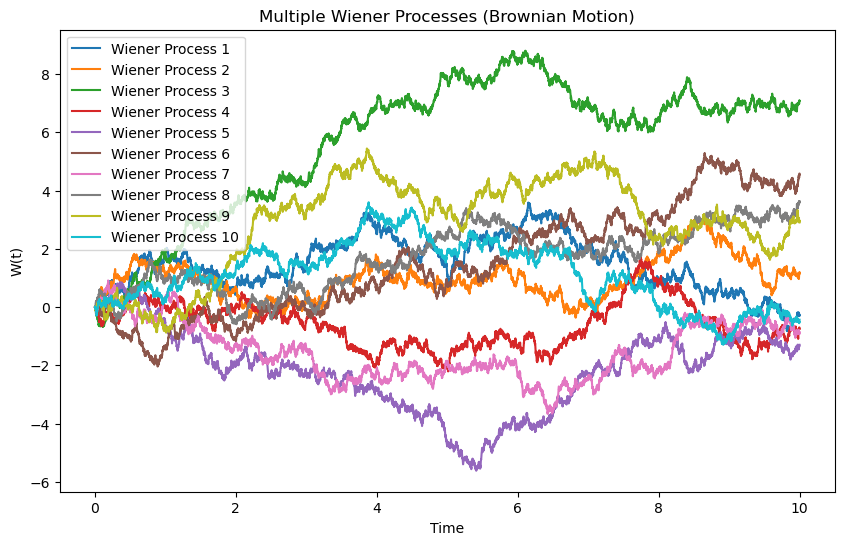

In [4]:
n_processes = 10
n_steps = 10000
T = 10.0  
dt = T / n_steps  

def wiener_process(n_steps, dt):
    dW = np.sqrt(dt) * np.random.randn(n_steps)
    W = np.cumsum(dW)
    W = np.insert(W, 0, 0)  # W(0) = 0 
    return W

wiener_processes = [wiener_process(n_steps, dt) for _ in range(n_processes)]


time = np.linspace(0, T, n_steps + 1)

plt.figure(figsize=(10, 6))
for i, wiener in enumerate(wiener_processes):
    plt.plot(time, wiener, label=f'Wiener Process {i+1}')
plt.title('Multiple Wiener Processes (Brownian Motion)')
plt.xlabel('Time')
plt.ylabel('W(t)')
plt.legend()
plt.show()

### Generalised Wiener Process
The basic Wiener process, dz, that has been developed so far has a drift rate of zero
and a variance rate of 1.0. The drift rate of zero means that the expected value of z
at any future time is equal to its current value. the variance rate of 1.0 means that
the variance of the change in z in a time interval of length T equals T. A generalized
Wiener process for a variable x can be defined in terms of dz as follows
$$dx = a\hspace{2pt}dt + b\hspace{2pt}dz$$
where a and b are constants. Considering the right hand side, the a dt term implies that x has an expected drift rate of $a$ per unit of time. With the b dz term, the equation is:
$ dx = a \hspace{2pt}dt$ 
which implies that 
$ \frac{dx}{dt} = a $ or 
$ x = x_0 + a t $
where $x_0$ is the value of x at time zero. In a period of time of length T, x increases by
an amount a T. The b dz term on the right-handed side can be regarded
as adding noses or variability to the parth followed by x. The amount of this noise or
variability is b times a Wiener process. A Wiener process has a standard deviation of
1.0. It follows that b times a Wiener process has a standard deviation of b. In a small
time interval ∆t, the change in value of x, ∆x given by $\Delta x = a\Delta t + \epsilon\sqrt{\Delta t}$
where, as before, ε is a random drawing from a standardized normal distribution. 

Thus
∆x has a normal distribution with

- mean of $∆x = a∆t$ 

- standard deviation of $∆x = b√∆t $

- variance of $∆x = b^2∆t$ 

Similar arguments to those given for a Wiener process how that the change in the value
of x in any time interval T is normally distributed with

- mean of $∆x = aT$ 

- standard deviation of $∆x = b\sqrt{T}$ 

- variance of $∆x = b^2T$ 



Thus, the generalize Wiener process has an expected drift rate
(average drift per unit of time) of $a$ and a variance rate (variance per unit of
time) of $b^2$


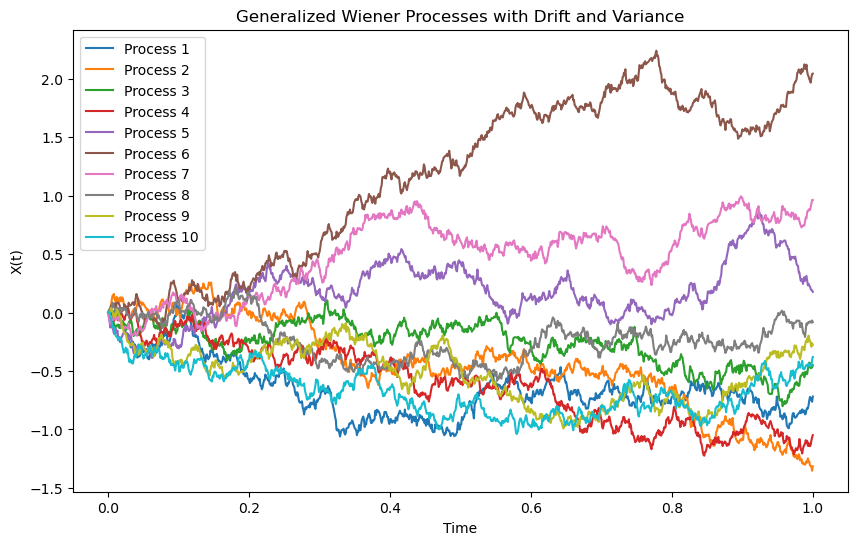

In [5]:
n_processes = 10  # Number of Wiener processes to simulate
n_steps = 1000  # Number of steps in each Wiener process
T = 1.0  # Total time
dt = T / n_steps  # Time step size
mu = 0.1  # Drift rate
sigma = 0.8  # Variance rate


def generalized_wiener_process(n_steps, dt, mu, sigma):
    dW = np.sqrt(dt) * np.random.randn(n_steps)
    W = np.cumsum(dW)
    t = np.linspace(0, T, n_steps)
    X = mu * t + sigma * W
    X = np.insert(X, 0, 0)  
    return X


generalized_wiener_processes = [generalized_wiener_process(n_steps, dt, mu, sigma) for _ in range(n_processes)]

time = np.linspace(0, T, n_steps + 1)


plt.figure(figsize=(10, 6))
for i, process in enumerate(generalized_wiener_processes):
    plt.plot(time, process, label=f'Process {i+1}')
plt.title('Generalized Wiener Processes with Drift and Variance')
plt.xlabel('Time')
plt.ylabel('X(t)')
plt.legend()
plt.show()

It is tempting to suggest that a stock price follows a generalized Wiener process; that
is, that it has a constant expected rift rate and a constant variance rate, However,
this model fails to capture a key aspect of stock prices. This is that the expected percentage return required by investors from a stock is independent of the stock price. If
investors require a 14% per annum expected return when the stock price is \$ 10, then
ceteris paribus, they will also require a 14% per annum expected return when it is \$
50. Clearly, the constant expected rift-rate assumption is inappropriate and needs to
be replaced by the assumption that the expected return (that is, expected rift divided
by the stock price) is constant. If S is the stock price at time t, the expected drift rate
in S should be assumed to be µS for some constant parameter, µ. This means that in
a short interval of time, ∆t, the expected increase in S is µS∆t. The parameter, µ, is
the expected rate of return on the stock, expressed in decimal form.
If the volatility of the stock price is always zero, this model implies that
$$\Delta S = \mu S \Delta t$$
in the limit as $\Delta t \rightarrow 0$ or 
$\frac{dS}{S} = \mu dt$
so that 
$$S_T = S_0e^{\mu T}$$ 
where $S_0$ and $S_T$ are the stock price at time zero and time T.

In practice, of course, a stock price does exhibit volatility. A reasonable assumption
is that the variability of the percentage return in a short period of time, ∆t, is the
same regardless of the stock price. This suggests that the
standard deviation of the change in a short period of time ∆t should be proportional
to the stock price and leads to the model:
$dS = \mu S dt + \sigma Sdz$ or 
$$dSS = \mu dt + \sigma dz$$

The variable $\sigma$ is the volatility of the stock price, and $\mu$ is its expected rate of return.

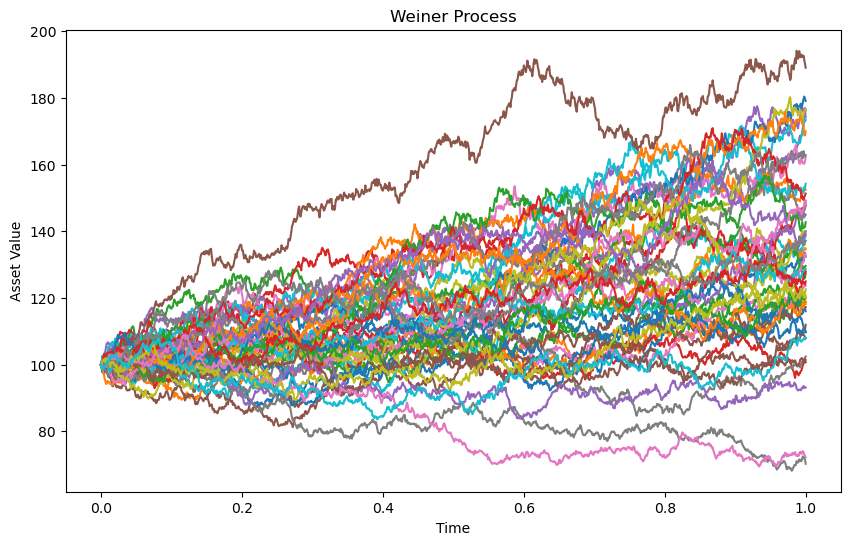

In [6]:

n_processes = 50  # Number of processes to simulate
n_steps = 1000  # Number of steps in each process
T = 1.0  # Total time
dt = T / n_steps  # Time step size
mu = 0.25  # Drift rate
sigma = 0.2  # Variance rate
S0 = 100  # Initial value of S


def geometric_brownian_motion(n_steps, dt, mu, sigma, S0):
    S = np.zeros(n_steps + 1)
    S[0] = S0
    for t in range(1, n_steps + 1):
        dZ = np.sqrt(dt) * np.random.randn()
        S[t] = S[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dZ)
    return S


gbm_processes = [geometric_brownian_motion(n_steps, dt, mu, sigma, S0) for _ in range(n_processes)]


time = np.linspace(0, T, n_steps + 1)


plt.figure(figsize=(10, 6))
for i, process in enumerate(gbm_processes):
    plt.plot(time, process)
plt.title('Weiner Process')
plt.xlabel('Time')
plt.ylabel('Asset Value')
plt.show()



### Extending towards research

Let's take the position of a quant researcher, what are the downfalls of modelling the stock market as a Wiener process?

Can we do better?



### Limitations

- Log-Normal Distribution of Returns: Stock prices follow a log-normal distribution rather than a normal distribution. 

- Constant Drift and Volatility:
The "drift" term (expected return rate) is constant over time. This represents the expected growth rate of the stock. The "volatility" term (standard deviation of returns) is also constant over time. It captures the price's randomness and risk, assumed to be unchanging despite fluctuations in the market.

- No Jumps or Discontinuities: The model assumes that prices evolve in a continuous manner without any jumps. This excludes events like sudden market crashes, which in reality can occur due to unexpected news or other shocks.

- Market Efficiency and Random Walk: The model presumes that markets are efficient, meaning all known information is already reflected in the current price. Hence, price movements follow a "random walk" without any predictable patterns or trends beyond the drift rate.

- Independence of Returns: The model assumes that returns are independent of each other over time, meaning past price movements do not influence future price movements. Each increment of the Wiener process is assumed to be independently distributed.

- Absence of Arbitrage: The model operates on the assumption that arbitrage opportunities do not exist, which is crucial for risk-neutral pricing and valuation models.

- Continuous Trading: It assumes trading is continuous, so investors can trade stocks at any moment. In reality, markets have discrete trading hours, and liquidity constraints can affect prices.

- Risk-Neutral Valuation (for option pricing): When used in option pricing, the model assumes a risk-neutral world where investors are indifferent to risk, meaning expected returns are equal to the risk-free rate. This simplifies the valuation of options and derivatives by allowing us to discount at the risk-free rate.

https://maxmatsuda.com/Papers/Intro/Intro%20to%20MJD%20Matsuda.pdf

https://arxiv.org/pdf/1406.2661

https://colab.research.google.com/github/ydataai/ydata-synthetic/blob/master/examples/timeseries/TimeGAN_Synthetic_stock_data.ipynb#scrollTo=FGzo4LZqjOWA


### Exercise

Research more accurate models to model the stock market. Create a jupyter notebook using the given model. List the capabilities/improvements over the GBM, list the limitations. Present your findings at the next workshop.

